In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

# Data Acquisition
1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:

# Exercise 1
iris = data("iris")


In [3]:
# 1a. print the first 3 rows
iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
# 1b. print the number of rows and columns (shape)
iris.shape

(150, 5)

In [5]:
# 1c. print the column names
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [6]:
# 1d. print the data type of each column
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [7]:
# 1e. print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based 
# on these statistics? Not sure!

iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


# 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [8]:
telco = pd.read_excel("Spreadsheets_Exercises.xlsx")

In [9]:
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,Unnamed: 30
0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,...,0.0,1.0,3.0,2021-08-16,0.0,False,2 Year,No Phone Service,DSL,NaN
1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,One Line,No Internet Service,NaN
2,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,Two or More Lines,DSL,NaN
3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,...,NaN,NaN,NaN,2021-08-16,0.0,False,1 Year,One Line,No Internet Service,NaN
4,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,One Line,No Internet Service,NaN


In [10]:
# Setup Yes/No as booleans
partner = telco.partner == "Yes"
dependents = telco.dependents == "Yes"
churn = telco.churn == "Yes"
is_senior_citizen = telco.is_senior_citizen == 1

In [11]:
# map phone_service, internet_service, and contract_type
contract_type = {
    0: "Month-to-Month",
    1: "1 Year",
    2: "2 Year"
}

phone_service = {
    0: "No Phone Service",
    1: "One line",
    2: "Two or more lines"
}

internet_service = {
    0: "No Internet Service",
    1: "DSL",
    2: "Fiber Optic"
}

telco.contract_type = telco.contract_type.map(contract_type)
telco.phone_service = telco.phone_service.map(phone_service)
telco.internet_service = telco.internet_service.map(internet_service)

In [12]:
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,Unnamed: 30
0,1371-DWPAZ,Female,0,Yes,Yes,No Phone Service,DSL,2 Year,Credit card (automatic),56.05,...,0.0,1.0,3.0,2021-08-16,0.0,False,2 Year,No Phone Service,DSL,NaN
1,2520-SGTTA,Female,0,Yes,Yes,One line,No Internet Service,2 Year,Mailed check,20.00,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,One Line,No Internet Service,NaN
2,2775-SEFEE,Male,0,No,Yes,Two or more lines,DSL,2 Year,Bank transfer (automatic),61.90,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,Two or More Lines,DSL,NaN
3,2923-ARZLG,Male,0,Yes,Yes,One line,No Internet Service,1 Year,Mailed check,19.70,...,NaN,NaN,NaN,2021-08-16,0.0,False,1 Year,One Line,No Internet Service,NaN
4,3115-CZMZD,Male,0,No,Yes,One line,No Internet Service,2 Year,Mailed check,20.25,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,One Line,No Internet Service,NaN


In [13]:
a = {"a": 1, "b": 2}
b = a
a["a"] = 23
b

{'a': 23, 'b': 2}

In [14]:
a = [1, 2, 3]
b = a
b[0] = 500
a

[500, 2, 3]

In [15]:
a = np.array([1, 2, 3])
b = a
b[0] = 450
a

array([450,   2,   3])

In [16]:
# Assign the first 100 rows
df_excel_sample = telco.loc[0:100, :].copy() # Why am I using .copy, here?
df_excel_sample.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,dependents_no_partners,yes_dependents_and_partners,Unnamed: 23,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,Unnamed: 30
0,1371-DWPAZ,Female,0,Yes,Yes,No Phone Service,DSL,2 Year,Credit card (automatic),56.05,...,0.0,1.0,3.0,2021-08-16,0.0,False,2 Year,No Phone Service,DSL,NaN
1,2520-SGTTA,Female,0,Yes,Yes,One line,No Internet Service,2 Year,Mailed check,20.00,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,One Line,No Internet Service,NaN
2,2775-SEFEE,Male,0,No,Yes,Two or more lines,DSL,2 Year,Bank transfer (automatic),61.90,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,Two or More Lines,DSL,NaN
3,2923-ARZLG,Male,0,Yes,Yes,One line,No Internet Service,1 Year,Mailed check,19.70,...,NaN,NaN,NaN,2021-08-16,0.0,False,1 Year,One Line,No Internet Service,NaN
4,3115-CZMZD,Male,0,No,Yes,One line,No Internet Service,2 Year,Mailed check,20.25,...,NaN,NaN,NaN,2021-08-16,0.0,False,2 Year,One Line,No Internet Service,NaN


In [17]:
# print the number of rows in the dataframe
telco.shape[0]

7043

In [18]:
# print the first 5 column names
telco.columns[0:5] # or telco.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [19]:
# Print the column names that have a data type of object.¶
# df_excel_sample.select_dtypes(include='object').head()
telco.select_dtypes(include='object').columns.tolist()

['customer_id',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'internet_service',
 'contract_type',
 'payment_type',
 'churn',
 'contract_type_desc',
 'phone_type_desc',
 'internet_type_desc']

In [20]:
# compute the range for each of the numeric variables.
numerics = telco.select_dtypes(include=['float64', 'int64'])

In [21]:
print("Range from min-max of numeric values")
numerics.max() - numerics.min()

Range from min-max of numeric values


is_senior_citizen                 1.000000
monthly_charges                 100.500000
total_charges                  8666.000000
tenure                           79.341772
partner_dependents                3.000000
no_partners_no_dependents         0.000000
no_dependents_yes_partners        0.000000
dependents_no_partners            0.000000
yes_dependents_and_partners       0.000000
Unnamed: 23                       0.000000
average_monthly_charges         118.750000
Unnamed: 30                            NaN
dtype: float64

In [22]:
# Read in a google sheet, being sure to update the query string to export?format=csv
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
url = url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(url)

# Print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
# How many rows and columns?
df_google.shape

(891, 12)

In [24]:
# Output the column names
df_google.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [25]:
# output the data type of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
# print the summary statistics for each of the numeric variables
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [27]:
# print the unique values for each of your categorical variables
for column in df_google.select_dtypes(include='object').columns:
    print(f"Values in the {column} column:")
    print(df_google[column].value_counts())
    print("------")
    print()

Values in the Name column:
Bowen, Mr. David John "Dai"        1
O'Connor, Mr. Maurice              1
Mernagh, Mr. Robert                1
Isham, Miss. Ann Elizabeth         1
O'Connell, Mr. Patrick D           1
                                  ..
Vander Planke, Mr. Leo Edmondus    1
Wiseman, Mr. Phillippe             1
Williams, Mr. Leslie               1
Attalah, Miss. Malake              1
Kimball, Mr. Edwin Nelson Jr       1
Name: Name, Length: 891, dtype: int64
------

Values in the Sex column:
male      577
female    314
Name: Sex, dtype: int64
------

Values in the Ticket column:
1601               7
CA. 2343           7
347082             7
CA 2144            6
3101295            6
                  ..
2693               1
SOTON/OQ 392089    1
PC 17475           1
365222             1
330919             1
Name: Ticket, Length: 681, dtype: int64
------

Values in the Cabin column:
G6                 4
B96 B98            4
C23 C25 C27        4
C22 C26            3
E101          

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

import acquire

# Data Preparation - Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

In [29]:
df = acquire.new_iris_data()

In [30]:
df.head(5)

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


### 2. Drop the species_id and measurement_id columns.

In [31]:
df = df.drop(columns=['species_id'])

In [32]:
df.head(5)

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


### 3. Rename the species_name column to just species. 

In [33]:
df = df.rename(columns={'species_name':'species'})
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


### 4. Create dummy variables of the species name.

In [34]:
# create dummies using .get_dummies(column_name,not dropping any of the dummy columns)
dummy_df = pd.get_dummies(df['species'], drop_first=False)
dummy_df.head()

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [35]:
# join original df with dummies df using .concat([original_df,dummy_df], join along the index)
df = pd.concat([df, dummy_df], axis=1)
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [36]:
# get back original data
df = acquire.new_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


## 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [37]:
def prep_iris(df):
    '''Prepares acquired Iris data for exploration'''
    
    # drop column using .drop(columns=column_name)
    df = df.drop(columns='species_id')
    
    # remame column using .rename(columns={current_column_name : replacement_column_name})
    df = df.rename(columns={'species_name':'species'})
    
    # create dummies dataframe using .get_dummies(column_name,not dropping any of the dummy columns)
    dummy_df = pd.get_dummies(df['species'], drop_first=False)
    
    # join original df with dummies df using .concat([original_df,dummy_df], join along the index)
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

In [38]:
prep_iris(df).head()

,species,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,1,0,0
1,setosa,4.9,3.0,1.4,0.2,1,0,0
2,setosa,4.7,3.2,1.3,0.2,1,0,0
3,setosa,4.6,3.1,1.5,0.2,1,0,0
4,setosa,5.0,3.6,1.4,0.2,1,0,0


In [39]:
# get back original data
df = acquire.new_iris_data()
df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


# Tiny Data - Attendance Data

Load the attendance.csv file and calculate an attendnace percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

You should end up with something like this:


name

Billy    0.5250

Jane     0.6875

John     0.9125
Sally    0.7625

Name: grade, dtype: float64

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
from pydataset import data

In [127]:
df = pd.read_csv('untidy-data/attendance.csv')
df.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [128]:
# rename the students column
df = df.rename(columns={'Unnamed: 0' : 'name'})

In [129]:
# make the table

df = df.melt(id_vars=['name'],
             var_name='date',
                value_name = 'attendance_value')

In [130]:
df.head()

,name,date,attendance_value
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [131]:
# create a new column to hold the attendance and copy the data to it
df[['attendance']] = df.attendance_value

In [132]:
df = df.replace({'attendance_value': {'H' : .5, 'A' : 0, 'T': .9, 'P':1}})

In [133]:
df.head()

,name,date,attendance_value,attendance
0,Sally,2018-01-01,1.0,P
1,Jane,2018-01-01,0.0,A
2,Billy,2018-01-01,0.0,A
3,John,2018-01-01,1.0,P
4,Sally,2018-01-02,0.9,T


In [134]:
# group by student and get mean
df.groupby('name').attendance_value.mean()

name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: attendance_value, dtype: float64

# 2. Coffee Levels

Read the coffee_levels.csv file.

Transform the data so that each carafe is in it's own column.

Is this the best shape for the data?

In [135]:
df = pd.read_csv('untidy-data/coffee_levels.csv')
df.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


In [142]:
df.pivot_table(index = 'hour',
                   columns = 'coffee_carafe',
                   values = 'coffee_amount').reset_index()

coffee_carafe,hour,x,y,z
0,8,0.816164,0.189297,0.999264
1,9,0.451018,0.521502,0.915990
2,10,0.843279,0.023163,0.144928
3,11,0.335533,0.235529,0.311495
4,12,0.898291,0.017009,0.771947
5,13,0.310711,0.997464,0.398520
6,14,0.507288,0.058361,0.864464
7,15,0.215043,0.144644,0.436364
8,16,0.183891,0.544676,0.280621
9,17,0.391560,0.594126,0.436677


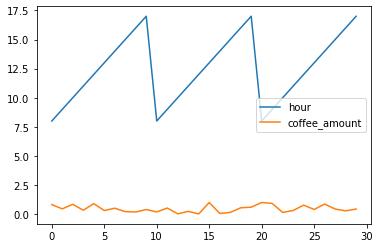

In [145]:
df.plot();

# 3. Cake Recipes
Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
Tidy the data as necessary.
Which recipe, on average, is the best? recipe b
Which oven temperature, on average, produces the best results? 275
Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [146]:
df = pd.read_csv('untidy-data/cake_recipes.csv')
df.head()

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recipe:position  8 non-null      object 
 1   225              8 non-null      float64
 2   250              8 non-null      float64
 3   275              8 non-null      float64
 4   300              8 non-null      float64
dtypes: float64(4), object(1)
memory usage: 448.0+ bytes


In [148]:
# split the 'recipe:position' column
df['recipe:position'].str.split(":", expand = True)
df.head()

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084


In [149]:
# expand the column and create two new ones
df[['recipe', 'position']] = df['recipe:position'].str.split(':', expand = True)
df.head()

,recipe:position,225,250,275,300,recipe,position
0,a:bottom,61.738655,53.912627,74.414730,98.786784,a,bottom
1,a:top,51.709751,52.009735,68.576858,50.228470,a,top
2,b:bottom,57.095320,61.904369,61.196980,99.248541,b,bottom
3,b:top,82.455004,95.224151,98.594881,58.169349,b,top
4,c:bottom,96.470207,52.001358,92.893227,65.473084,c,bottom


In [150]:
# drop column 'recipe:position'
df.drop(columns = 'recipe:position', inplace = True)
df.head()

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom


In [151]:
# melt data
df_melt = df.melt(id_vars = ['recipe', 'position'], var_name = 'temperature', 
                  value_name = 'score')
df_melt.head()

,recipe,position,temperature,score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


In [152]:
# Which recipe, on average, is the best? B
df_melt.groupby(['recipe']).score.mean().idxmax()

'b'

In [153]:
best_recipe = df_melt.groupby(['recipe']).score.mean().idxmax()
best_score = df_melt.groupby(['recipe']).score.mean().max()
print(f' The best recipe is \'{best_recipe}\' with score of {round(best_score, 1)}')

 The best recipe is 'b' with score of 76.7


In [154]:
# Which oven temperature, on average, produces the best results?
df_melt.groupby('temperature').score.mean().idxmax()

'275'

In [155]:
best_temp = df_melt.groupby(['temperature']).score.mean().idxmax()
best_score = df_melt.groupby(['temperature']).score.mean().max()
print(f' The best temperature is \'{best_temp}F\' with score of {round(best_score, 1)}')

 The best temperature is '275F' with score of 74.9


In [156]:
# Which combination of recipe, rack position, and temperature gives the best result?
df_melt.groupby(['temperature', 'recipe', 'position']).score.mean()

temperature  recipe  position
225          a       bottom      61.738655
                     top         51.709751
             b       bottom      57.095320
                     top         82.455004
             c       bottom      96.470207
                     top         71.306308
             d       bottom      52.799753
                     top         96.873178
250          a       bottom      53.912627
                     top         52.009735
             b       bottom      61.904369
                     top         95.224151
             c       bottom      52.001358
                     top         82.795477
             d       bottom      58.670419
                     top         76.101363
275          a       bottom      74.414730
                     top         68.576858
             b       bottom      61.196980
                     top         98.594881
             c       bottom      92.893227
                     top         92.098049
             d       bot

In [157]:
best_comb = df_melt.groupby(['temperature', 'recipe', 'position']).score.mean().idxmax()
best_score = df_melt.groupby(['temperature', 'recipe', 'position']).score.mean().max()
print(f' The best combination is \'{best_comb}\' with score of {round(best_score, 1)}')

 The best combination is '('300', 'b', 'bottom')' with score of 99.2


# Exploratory Analysis - 

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above: August 17-2021

Acquire, prepare & split your data. 

In [85]:
from env import host, user, password

In [86]:
# Acquire data
#df = acquire.new_iris_data()

def get_connection(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

# query to acquire the iris data
query = "SELECT measurements.measurement_id, measurements.sepal_length,\
                measurements.sepal_width, measurements.petal_length, \
                measurements.petal_width, species.species_name, species.species_id \
            FROM measurements JOIN species ON(species.species_id=measurements.species_id)"

# function to get the data and run the query
def get_data():
    return pd.read_sql(query,get_connection('iris_db'))

# acquire the data
df = get_data()

In [87]:
df.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,species_id
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1


In [88]:
def prep_iris_inline(df):
    df = df.rename(columns={'species_name': 'species'})
    df = df.drop(columns=['measurement_id', 'species_id'])
    return df

In [89]:
df = prep_iris_inline(df)

In [90]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [92]:
# 80/20 train test split
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.species)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)

In [94]:
print(f'train:{train.shape} validate:{validate.shape} test:{test.shape}')

train:(84, 5) validate:(36, 5) test:(30, 5)


# 2. Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

In [95]:
cat_vars = ['species']
#cat_vars = ['setosa', 'versicolor', 'virginica']
quant_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

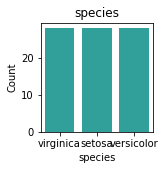

               species  Count  Percent
virginica    virginica     28    33.33
setosa          setosa     28    33.33
versicolor  versicolor     28    33.33
_________________________________________________________________


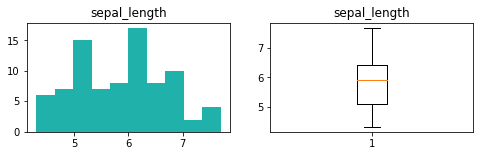

count    84.000000
mean      5.847619
std       0.841324
min       4.300000
25%       5.075000
50%       5.900000
75%       6.425000
max       7.700000
Name: sepal_length, dtype: float64


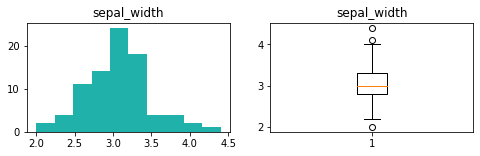

count    84.000000
mean      3.053571
std       0.417233
min       2.000000
25%       2.800000
50%       3.000000
75%       3.300000
max       4.400000
Name: sepal_width, dtype: float64


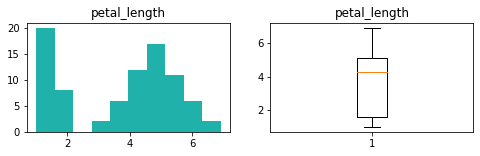

count    84.000000
mean      3.738095
std       1.765459
min       1.000000
25%       1.600000
50%       4.300000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


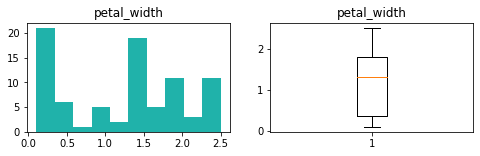

count    84.000000
mean      1.208333
std       0.775717
min       0.100000
25%       0.375000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64


In [96]:
explore.explore_univariate(train, cat_vars, quant_vars)

In [97]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.847619,3.053571,3.738095,1.208333
std,0.841324,0.417233,1.765459,0.775717
min,4.300000,2.000000,1.000000,0.100000
25%,5.075000,2.800000,1.600000,0.375000
50%,5.900000,3.000000,4.300000,1.300000
75%,6.425000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


In [98]:
#For each species (categorical variable): create a frequency table and a bar plot 
    # of those frequencies.
    
train.value_counts().head()

sepal_length  sepal_width  petal_length  petal_width  species   
4.3           3.0          1.1           0.1          setosa        1
6.3           2.3          4.4           1.3          versicolor    1
6.4           2.9          4.3           1.3          versicolor    1
              2.7          5.3           1.9          virginica     1
6.3           3.4          5.6           2.4          virginica     1
dtype: int64

In [99]:
train.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166612,0.900357,0.860775
sepal_width,-0.166612,1.000000,-0.415310,-0.323396
petal_length,0.900357,-0.415310,1.000000,0.965383
petal_width,0.860775,-0.323396,0.965383,1.000000


<AxesSubplot:xlabel='species'>

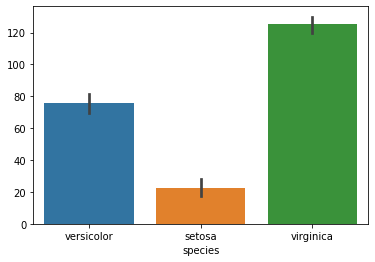

In [56]:
sns.barplot(x=train.species, y=train.index)

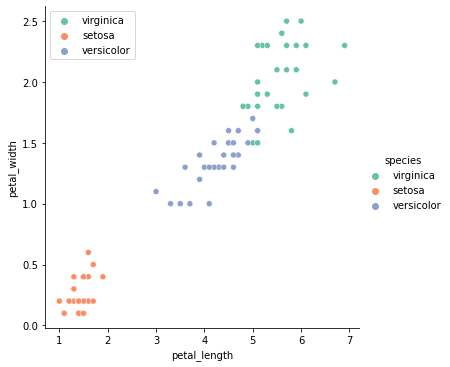

In [100]:
sns.relplot(x='petal_length', y='petal_width', data=train, hue='species', palette='Set2')
plt.legend()
plt.show()

In [58]:
# petal lenght and with of the virginica is more than the setosa.

# 3. Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

In [102]:
print(cat_vars)
print(quant_vars)

['species']
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


sepal_length 
____________________



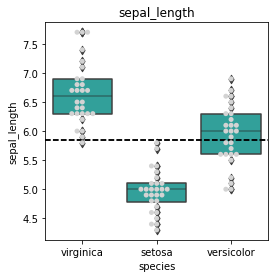

            count      mean       std  min    25%  50%  75%  max
species                                                         
setosa       28.0  4.957143  0.362531  4.3  4.775  5.0  5.1  5.8
versicolor   28.0  5.935714  0.512231  5.0  5.600  6.0  6.3  6.9
virginica    28.0  6.650000  0.532986  5.8  6.300  6.6  6.9  7.7 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

sepal_width 
____________________



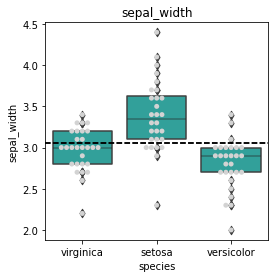

            count      mean       std  min  25%   50%    75%  max
species                                                          
setosa       28.0  3.385714  0.433516  2.3  3.1  3.35  3.625  4.4
versicolor   28.0  2.800000  0.303071  2.0  2.7  2.90  3.000  3.4
virginica    28.0  2.975000  0.260519  2.2  2.8  3.00  3.200  3.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

petal_length 
____________________



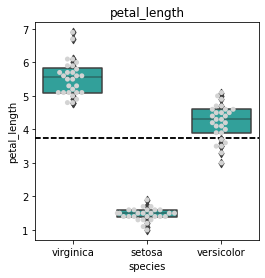

            count      mean       std  min  25%   50%    75%  max
species                                                          
setosa       28.0  1.457143  0.185450  1.0  1.4  1.50  1.600  1.9
versicolor   28.0  4.217857  0.522142  3.0  3.9  4.30  4.600  5.1
virginica    28.0  5.539286  0.525173  4.8  5.1  5.55  5.825  6.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________

petal_width 
____________________



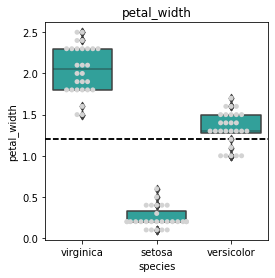

            count      mean       std  min    25%   50%    75%  max
species                                                            
setosa       28.0  0.246429  0.129048  0.1  0.200  0.20  0.325  0.6
versicolor   28.0  1.332143  0.205577  1.0  1.275  1.30  1.500  1.7
virginica    28.0  2.046429  0.294998  1.5  1.800  2.05  2.300  2.5 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=0.0, pvalue=0.0)

____________________



In [103]:
cat_vars = cat_vars[1:]
explore.explore_bivariate(train, 'species', cat_vars, quant_vars)

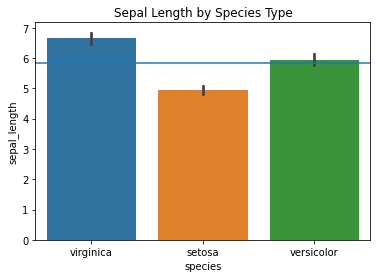

In [104]:
sns.barplot(data=train, x='species', y='sepal_length')
plt.axhline(y=train.sepal_length.mean())
plt.title('Sepal Length by Species Type')
plt.show()

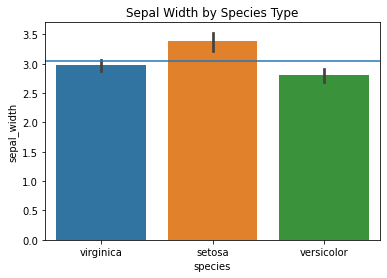

In [105]:
sns.barplot(data=train, x='species', y='sepal_width')
plt.axhline(y=train.sepal_width.mean())
plt.title('Sepal Width by Species Type')
plt.show()

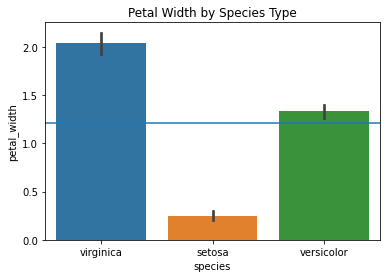

In [106]:
sns.barplot(data=train, x='species', y='petal_width')
plt.axhline(y=train.petal_width.mean())
plt.title('Petal Width by Species Type')
plt.show()

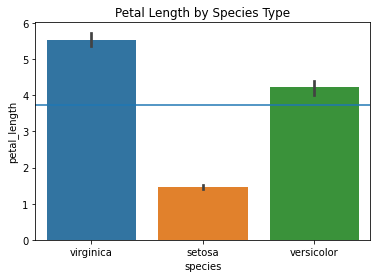

In [107]:
sns.barplot(data=train, x='species', y='petal_length')
plt.axhline(y=train.petal_length.mean())
plt.title('Petal Length by Species Type')
plt.show()

## 3b. For each measurement type, compute the descriptive statistics for each species.

In [108]:
train[train.species=='setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,4.957143,3.385714,1.457143,0.246429
std,0.362531,0.433516,0.185450,0.129048
min,4.300000,2.300000,1.000000,0.100000
25%,4.775000,3.100000,1.400000,0.200000
50%,5.000000,3.350000,1.500000,0.200000
75%,5.100000,3.625000,1.600000,0.325000
max,5.800000,4.400000,1.900000,0.600000


In [109]:
train[train.species=='versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.935714,2.800000,4.217857,1.332143
std,0.512231,0.303071,0.522142,0.205577
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.700000,3.900000,1.275000
50%,6.000000,2.900000,4.300000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,6.900000,3.400000,5.100000,1.700000


In [67]:
train[train.species=='virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.625000,2.960714,5.535714,2.021429
std,0.532378,0.318956,0.496815,0.293582
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.450000,3.000000,5.500000,2.000000
75%,6.900000,3.100000,5.800000,2.300000
max,7.900000,3.800000,6.900000,2.500000


## 3c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [110]:
#this is mean petal width for virginica
train[train.species=='virginica'].petal_width.mean()

2.0464285714285704

In [111]:
#this is mean petal width for versiolor
train[train.species=='versicolor'].petal_width.mean()

1.332142857142857

In [112]:
from scipy import stats

In [113]:

#MannWhitney for petal width in Virginica vs Versicolor
s,p= stats.mannwhitneyu(train[train.species=='virginica'].petal_width, train[train.species=='versicolor'].petal_width)
s,p

(15.5, 2.982389808696449e-10)

In [114]:
#MannWhitney for petal length in Virginica vs Versicolor
s,p= stats.mannwhitneyu(train[train.species=='virginica'].petal_length, train[train.species=='versicolor'].petal_length)
s,p

(12.5, 2.5253450566492905e-10)

In [115]:
#MannWhitney for sepal width in Virginica vs Versicolor
s,p= stats.mannwhitneyu(train[train.species=='virginica'].sepal_width, train[train.species=='versicolor'].sepal_width)
s,p

(250.0, 0.009508012794926874)

In [116]:
#MannWhitney for sepal length in Virginica vs Versicolor
s,p= stats.mannwhitneyu(train[train.species=='virginica'].sepal_length, train[train.species=='versicolor'].sepal_length)
s,p

(132.0, 1.0119920315840642e-05)

## 3d. Document takeaways & any actions. 

In [75]:
#I think my data is off

# 4. Multivariate Stats

4a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.


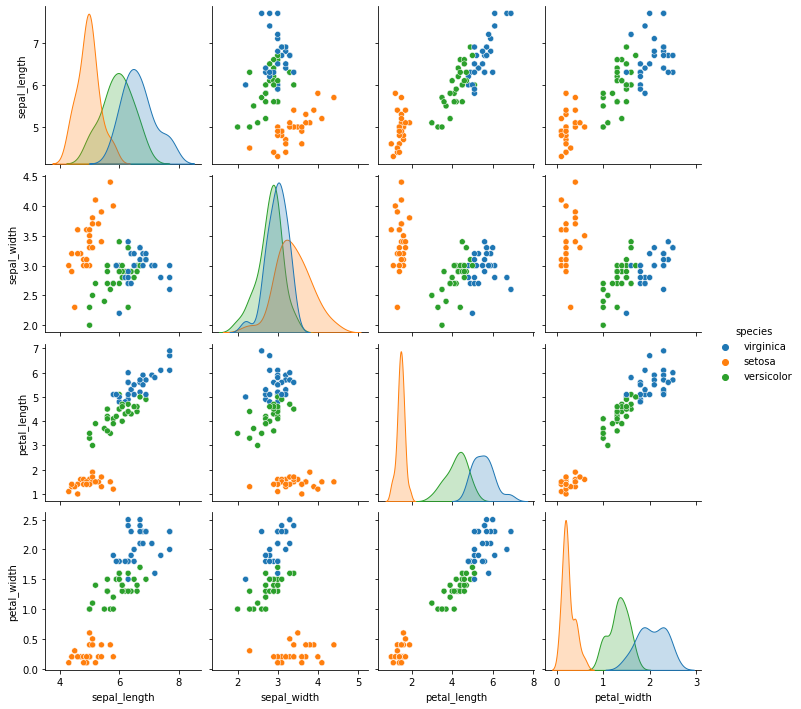

In [117]:
sns.pairplot(data=train, hue='species')

## 4b. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [119]:
melted_train=pd.melt(train, id_vars='species')
melted_train.head()

,species,variable,value
0,virginica,sepal_length,6.0
1,setosa,sepal_length,5.0
2,versicolor,sepal_length,5.7
3,versicolor,sepal_length,6.4
4,versicolor,sepal_length,6.2


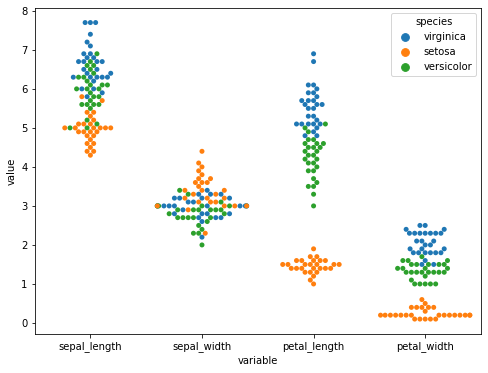

In [120]:
plt.figure(figsize=(8,6))
p= sns.swarmplot(
x='variable',
y='value',
hue='species',
data=melted_train)

## 4c. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [121]:
#- is the petal area signficantly different in virginica compared to versicolor
#create new column that is train
train['petal_area'] = train.petal_length * train.petal_width

In [122]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,petal_area
138,6.0,3.0,4.8,1.8,virginica,8.64
7,5.0,3.4,1.5,0.2,setosa,0.30
79,5.7,2.6,3.5,1.0,versicolor,3.50
74,6.4,2.9,4.3,1.3,versicolor,5.59
97,6.2,2.9,4.3,1.3,versicolor,5.59


In [123]:
s,p= stats.mannwhitneyu(train[train.species=='virginica'].petal_area, train[train.species=='versicolor'].petal_area)
s,p

(5.0, 1.1940082142528982e-10)

#### We reject the $H_0$. There is evidence to suggest that petal area between virginica and versicolor are the same

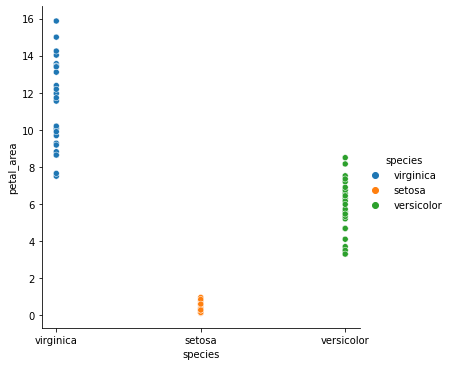

In [124]:
sns.relplot(data=train, x='species', y='petal_area', hue='species')
plt.show()

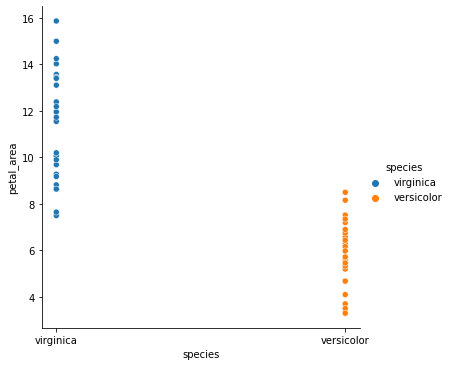

In [125]:
#same plot as above but excludes setosa.
no_setosa = train[train.species!='setosa']
sns.relplot(data = no_setosa, x='species', y='petal_area', hue='species')
plt.show()